In [1]:
import text_module
text_module.preprocessing('안녕하세요')

['안녕', '세요']

### NSMC
* Naver Sentiment Movie Corpus
* https://github.com/e9t/nsmc
* ratings_train.txt, ratings_test.txt 다운로드

In [ ]:
# txt파일을 읽어들이기
# id, document, label 단위로 변수에 저장
doc = []
with open('ratings_test.txt', encoding='utf8') as f:
    for line in f.readlines():
        #print(line.replace('\n','').split('\t'))
        doc.append(line.replace('\n','').split('\t'))
doc = doc[1:]
len(doc)

In [ ]:
# 내포된 for문
with open('ratings_test.txt', encoding='utf8') as f:
    doc = [line.replace('\n','').split('\t') for line in f.readlines()]
doc = doc[1:]
len(doc)

In [2]:
# 함수
def readFile(file):
    with open(file, encoding='utf8') as f:
        doc = [line.replace('\n','').split('\t') for line in f.readlines()]
    return doc[1:]

In [3]:
train_text = readFile('ratings_train.txt')
test_text = readFile('ratings_test.txt')

In [20]:
test_text = readFile('ratings_test.txt')

In [4]:
len(train_text), len(test_text)

(150000, 50000)

In [ ]:
train_text[:5]

In [ ]:
'''
(형태소추출, label)

'''
text_module.preprocessing(train_text[0][1])

In [5]:
pre_data = []
for row in train_text:
    #print(row[1])
    pre_data.append((text_module.preprocessing(row[1]),row[2]))

In [6]:
pre_data[0]

(['진짜', '짜증', '네요', '목소리'], '0')

In [14]:
# nsmc 텍스트 토크나이징 함수
def make_token(text):
    pre_data = []
    for row in text:
        #print(row[1])
        r = text_module.preprocessing(row[1])
        if r :
            pre_data.append((r,row[2]))
    return pre_data

In [21]:
#train_text = make_token(train_text)
train_text = pre_data
test_text = make_token(test_text)

In [22]:
# 형태소추출된 데이터를 pickle 저장
import pickle
with open('train_text.pk', 'wb') as f:
    pickle.dump(train_text, f)
with open('test_text.pk', 'wb') as f:
    pickle.dump(test_text, f)

In [23]:
train_text[0]

(['진짜', '짜증', '네요', '목소리'], '0')

In [24]:
test_text

[(['평점', '나쁘', '짜리', '더더욱', '잖아'], '0'),
 (['지루', '은데', '완전', '막장'], '0'),
 (['어도', '텐데', '나와서', '심기', '불편'], '0'),
 (['음악', '주가', '최고', '음악', '영화'], '1'),
 (['진정', '쓰레기'], '0'),
 (['미국', '애니', '튀어나온', '창의력', '로봇', '디자인', '고개', '한다'], '0'),
 (['갈수록',
   '개판',
   '중국',
   '영화',
   '유치',
   '내용',
   '무기',
   '유치',
   '남무',
   '그립',
   '동사서독',
   '영화',
   '이건',
   '아류'],
  '0'),
 (['이별', '아픔', '찾아오', '새로운', '인연', '기쁨', '모든', '사람', '그렇'], '1'),
 (['괜찮', '네요', '오랜만', '포켓몬스터', '밌어요'], '1'),
 (['한국', '독립', '영화', '한계', '그렇게', '아버지', '된다', '비교'], '0'),
 (['청춘',
   '아름답',
   '아름다움',
   '이성',
   '흔들',
   '는다',
   '찰나',
   '아름다움',
   '포착',
   '섬세',
   '아름다운',
   '수채화',
   '퀴어',
   '영화'],
  '1'),
 (['보이', '반전', '영화', '흡인력', '사라지'], '1'),
 (['스토리',
   '연출',
   '연기',
   '비주얼',
   '영화',
   '기본',
   '영화',
   '영화',
   '김문옥',
   '감독',
   '영화',
   '경력',
   '인데',
   '조무래기',
   '영화',
   '평론',
   '마인드',
   '빠져'],
  '0'),
 (['소위', '문가', '라는', '평점'], '1'),
 (['최고'], '1'),
 (['발연기', '도저히', '진짜', '이렇게', '연기', '라

In [25]:
test_text[0]

(['평점', '나쁘', '짜리', '더더욱', '잖아'], '0')

In [26]:
test_text[:10]

[(['평점', '나쁘', '짜리', '더더욱', '잖아'], '0'),
 (['지루', '은데', '완전', '막장'], '0'),
 (['어도', '텐데', '나와서', '심기', '불편'], '0'),
 (['음악', '주가', '최고', '음악', '영화'], '1'),
 (['진정', '쓰레기'], '0'),
 (['미국', '애니', '튀어나온', '창의력', '로봇', '디자인', '고개', '한다'], '0'),
 (['갈수록',
   '개판',
   '중국',
   '영화',
   '유치',
   '내용',
   '무기',
   '유치',
   '남무',
   '그립',
   '동사서독',
   '영화',
   '이건',
   '아류'],
  '0'),
 (['이별', '아픔', '찾아오', '새로운', '인연', '기쁨', '모든', '사람', '그렇'], '1'),
 (['괜찮', '네요', '오랜만', '포켓몬스터', '밌어요'], '1'),
 (['한국', '독립', '영화', '한계', '그렇게', '아버지', '된다', '비교'], '0')]

In [2]:
# pickle 데이터 불러오기
import pickle
with open('train_text.pk', 'rb') as f:
    train = pickle.load(f)
with open('test_text.pk', 'rb') as f:
    test = pickle.load(f)

In [3]:
len(train), len(test)

(150000, 48760)

In [6]:
train[:10]

[(['진짜', '짜증', '네요', '목소리'], '0'),
 (['포스터', '보고', '초딩', '영화', '오버', '연기', '가볍', '구나'], '1'),
 (['너무', '밓었', '추천', '한다'], '0'),
 (['교도소', '이야기', '구먼', '솔직히', '재미', '평점', '조정'], '0'),
 (['사이몬페그',
   '익살',
   '스런',
   '연기',
   '돋보였',
   '영화',
   '스파이더맨',
   '보이',
   '커스틴',
   '던스트',
   '너무나',
   '이뻐',
   '보였'],
  '1'),
 (['걸음마', '초등', '학교', '학년', '살용', '영화', 'ㅋㅋㅋ', '별반', '아까움'], '0'),
 (['원작', '긴장감', '제대로', '살려', '못했'], '0'),
 (['반개',
   '아깝',
   '나온다',
   '이응경',
   '길용우',
   '연기',
   '생활',
   '인지',
   '정말',
   '해도',
   '그것',
   '보단',
   '납치',
   '감금',
   '반복',
   '반복',
   '드라마',
   '가족',
   '연기',
   '사람',
   '모엿'],
  '0'),
 (['액션', '는데', '재미', '영화'], '1'),
 (['평점', '건데', '헐리우드', '화려', '너무', '길들여져'], '1')]

### NLTK

In [4]:
import nltk

In [7]:
tokens = [token for doc in train for token in doc[0]]
len(tokens)

1037745

In [8]:
tokens[:10]

['진짜', '짜증', '네요', '목소리', '포스터', '보고', '초딩', '영화', '오버', '연기']

In [10]:
text = nltk.Text(tokens)
text.vocab().most_common(10)

[('영화', 57567),
 ('는데', 11402),
 ('너무', 11013),
 ('정말', 9780),
 ('네요', 8990),
 ('재밌', 8985),
 ('진짜', 8350),
 ('ㅋㅋ', 7231),
 ('연기', 6823),
 ('최고', 6554)]

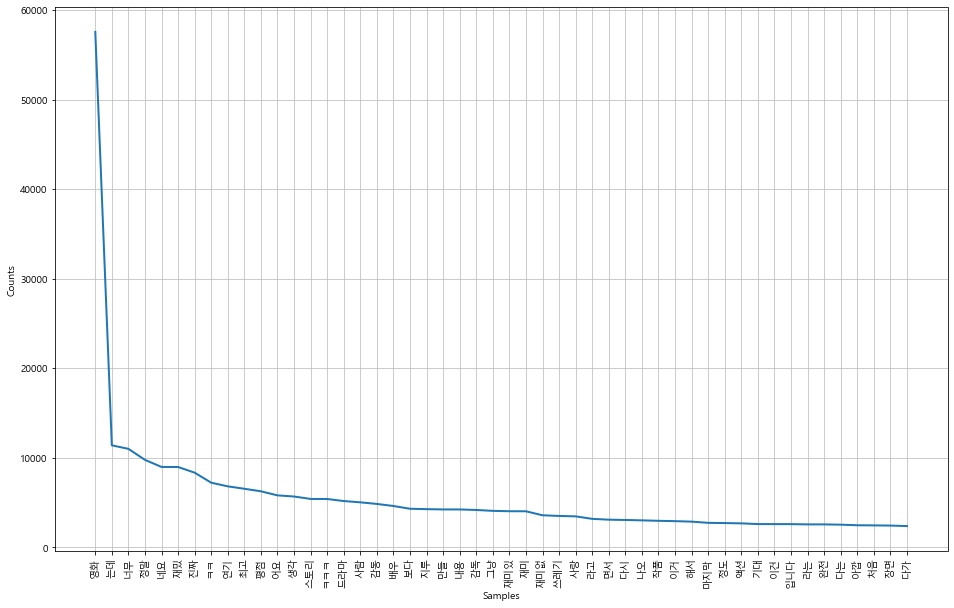

In [13]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font)
plt.figure(figsize=(16,10))
text.plot(50)

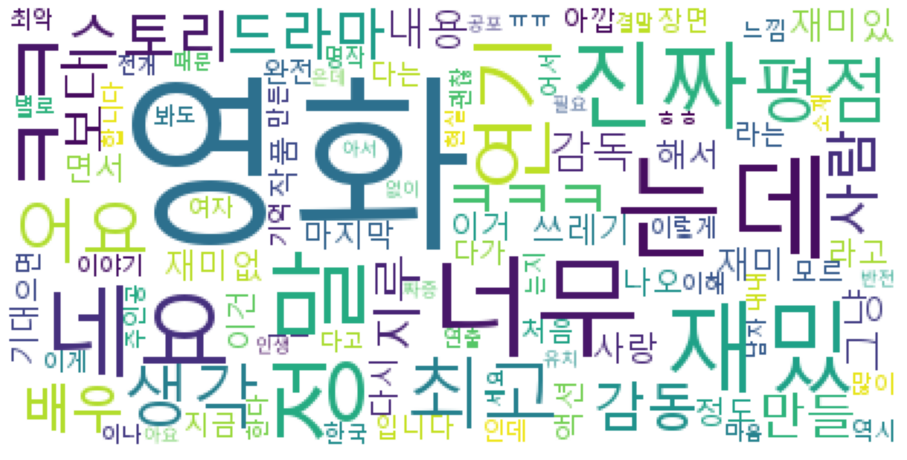

In [17]:
from wordcloud import WordCloud

data = text.vocab().most_common(100)
plt.figure(figsize=(16,10))

wc = WordCloud(background_color='white', font_path='C:/Windows/Fonts/malgun.ttf')
plt.imshow(wc.generate_from_frequencies(dict(data)))

plt.axis('off')
plt.show()